# North Macedonian 2024 Election Sentiment Analysis
---
This notebook performs sentiment analysis on the Social Media posts during the 2024 North Macedonian Elections.

##### Libraries

In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from googletrans import Translator
import nest_asyncio

In [3]:
text = """Himni dhe simbolet shtetërore kanë vendin dhe kohën e vet se ku përdoren dhe nuk duhet të shërbejnë për t’i bërë karshillëk askujt. 
Propozimi i kreut të VMRO-DPMNE Hristijan Mickoski që të obligon fëmijët çdo të hënë të këndojnë himnin shtetëror pasqyron mendësinë nacionaliste të VMRO-DPMNE për të ushqyer fëmijët me nacionalizëm dhe me këtë të motivohet politika e tyre drejt izolim shoqëror dhe shtetëror. 
Kam një propozim më kreativ se çka duhet të dëgjojnë fëmijët në këtë shtet dhe atë jo çdo të hënë por çdo ditë:
- të dëgjojnë se si VMRO-DPMNE shet nacionalizëm të rrejshëm ndërsa bën argatin e agjendave anti-evropiane!
- se si VMRO-DPMNE nxit urrejtje dhe ndasi!
-se si VMRO-DPMNE po bllokon të ardhmen evropiane të gjeneratave të reja!
-se si VMRO-DPMNE po izolon shtetin!
- se si VMRO-DPMNE ushtron pushtetin kundër kombit shqiptar në komunat që udhëheqin kuadrot e saj!
Me qasje të këtij lloji, shteti rrezikon shumë prandaj është i nevojshëm një bllok më i madh me orientim të qartë për të ardhmen evropiane të vendit."""

In [13]:
nest_asyncio.apply()  # Not needed here but safe in Jupyter

# Create a translator instance
translator = Translator()


# Translate the text (synchronous call)
text_translated = translator.translate(text, src='auto', dest='en')

# Print the translated text
print(text_translated.text)

# Store it if needed
# translated_text = text_translated.text


The hymns and state symbols have their place and time where they are used and should not serve to make anyone car.
The proposal of the head of the VMRO-DPMNE Hristijan Mickoski that obliges children every Monday to sing the state anthem reflects the nationalist mindset of VMRO-DPMNE to nourish children with nationalism and thus motivated their policy towards social and state isolation.
I have a more creative proposal on what children should hear in this country and not every Monday but every day:
-Listen to how VMRO-DPMNE sells false nationalism while making anti-European agendas!
- How VMRO-DPMNE promotes hatred and division!
-He as VMRO-DPMNE is blocking the European future of younger generations!
-He as VMRO-DPMNE is isolates the state!
- How VMRO-DPMNE exercises power against the Albanian nation in the municipalities that lead its cadres!
With access to this kind, the state is very risking therefore a larger block with a clear orientation for the country's European future is needed

In [15]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

translated_text = "The new government reforms are very promising and exciting."
sentiment = analyzer.polarity_scores(translated_text)

print("Sentiment Analysis Results:")
print(f"Negative: {sentiment['neg']}")
print(f"Neutral: {sentiment['neu']}")
print(f"Positive: {sentiment['pos']}")
print(f"Compound: {sentiment['compound']}")


Sentiment Analysis Results:
Negative: 0.0
Neutral: 0.52
Positive: 0.48
Compound: 0.7548


Current Working Directory: /Users/danielagjorgjieva/Desktop/north-macedonia-election-fact-checking


/var/folders/cj/41mhghc57qs23fd8t0938swm0000gn/T/ipykernel_11454/52884835.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment_label', order=['positive', 'neutral', 'negative'], palette='muted')


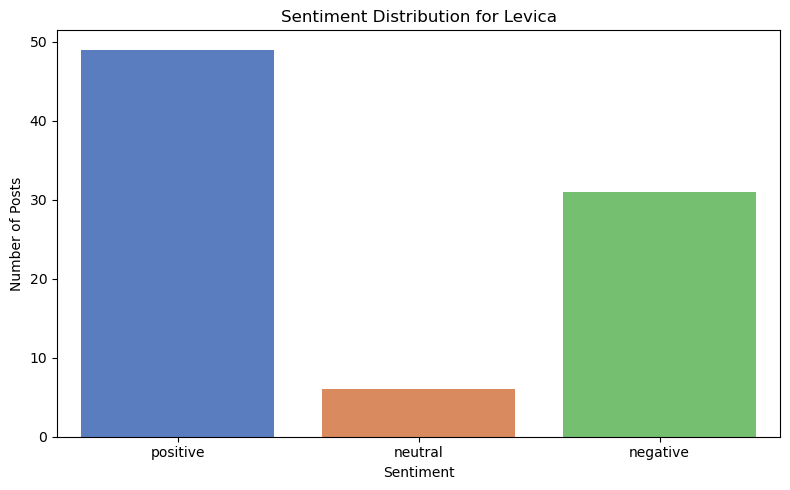

In [19]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from googletrans import Translator
import nest_asyncio
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ensure async loop compatibility (especially for Jupyter)
nest_asyncio.apply()

# Sanity check: confirm you're in the correct working directory
print("Current Working Directory:", os.getcwd())

# ✅ Corrected path based on your folder structure
file_path = "dataset/ad-creative-bodies-extraction/Left_ad_creative_bodies.csv"

# Check if file exists
assert os.path.exists(file_path), f"File not found: {file_path}"

# Load Levica ad data
df = pd.read_csv(file_path)
df = df.dropna(subset=["ad_creative_bodies"])  # Remove empty entries

# Set up translation and sentiment analyzer
translator = Translator()
analyzer = SentimentIntensityAnalyzer()

translated_texts = []
compound_scores = []
labels = []

for text in df["ad_creative_bodies"]:
    try:
        translated = translator.translate(text, src='auto', dest='en').text
    except:
        translated = text  # fallback if translation fails
    
    sentiment = analyzer.polarity_scores(translated)
    compound = sentiment["compound"]

    if compound >= 0.05:
        label = "positive"
    elif compound <= -0.05:
        label = "negative"
    else:
        label = "neutral"

    translated_texts.append(translated)
    compound_scores.append(compound)
    labels.append(label)

# Add sentiment columns
df["translated_text"] = translated_texts
df["compound"] = compound_scores
df["sentiment_label"] = labels

# Plot the sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sentiment_label', order=['positive', 'neutral', 'negative'], palette='muted')
plt.title("Sentiment Distribution for Levica")
plt.xlabel("Sentiment")
plt.ylabel("Number of Posts")
plt.tight_layout()
plt.show()


/var/folders/cj/41mhghc57qs23fd8t0938swm0000gn/T/ipykernel_11454/631923475.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment_label', order=['positive', 'neutral', 'negative'], palette='muted')


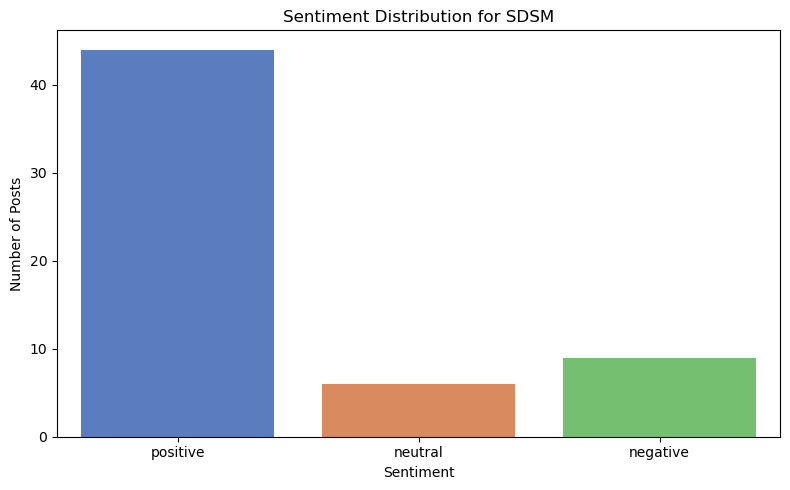

In [20]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from googletrans import Translator
import nest_asyncio
import matplotlib.pyplot as plt
import seaborn as sns

# Allow nested event loops in Jupyter
nest_asyncio.apply()

# Load SDSM dataset
df = pd.read_csv("dataset/ad-creative-bodies-extraction/SDSM_ad_creative_bodies.csv")
df = df.dropna(subset=["ad_creative_bodies"])

# Initialize translator and sentiment analyzer
translator = Translator()
analyzer = SentimentIntensityAnalyzer()

# Translate and analyze
translated_texts = []
compound_scores = []
labels = []

for text in df["ad_creative_bodies"]:
    try:
        translated = translator.translate(text, src='auto', dest='en').text
    except:
        translated = text  # Fallback to original

    sentiment = analyzer.polarity_scores(translated)
    compound = sentiment["compound"]
    
    if compound >= 0.05:
        label = "positive"
    elif compound <= -0.05:
        label = "negative"
    else:
        label = "neutral"

    translated_texts.append(translated)
    compound_scores.append(compound)
    labels.append(label)

# Add results to DataFrame
df["translated_text"] = translated_texts
df["compound"] = compound_scores
df["sentiment_label"] = labels



# Plot
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sentiment_label', order=['positive', 'neutral', 'negative'], palette='muted')
plt.title("Sentiment Distribution for SDSM")
plt.xlabel("Sentiment")
plt.ylabel("Number of Posts")
plt.tight_layout()
plt.show()


/var/folders/cj/41mhghc57qs23fd8t0938swm0000gn/T/ipykernel_11454/870715615.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment_label', order=['positive', 'neutral', 'negative'], palette='muted')


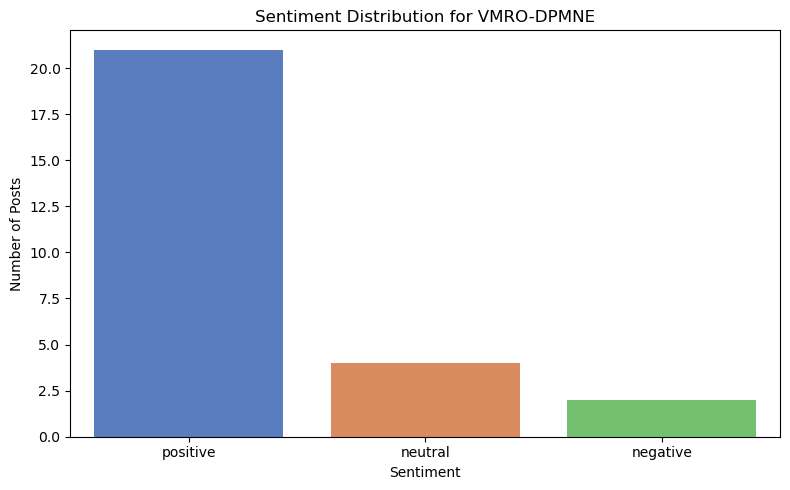

In [21]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from googletrans import Translator
import nest_asyncio
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Allow nested event loops in Jupyter (safe default)
nest_asyncio.apply()

# Load VMRO dataset
file_path = "dataset/ad-creative-bodies-extraction/VMRO-DPMNE_ad_creative_bodies.csv"
assert os.path.exists(file_path), f"File not found: {file_path}"

df = pd.read_csv(file_path)
df = df.dropna(subset=["ad_creative_bodies"])

# Initialize translator and sentiment analyzer
translator = Translator()
analyzer = SentimentIntensityAnalyzer()

# Translate and analyze
translated_texts = []
compound_scores = []
labels = []

for text in df["ad_creative_bodies"]:
    try:
        translated = translator.translate(text, src='auto', dest='en').text
    except:
        translated = text  # fallback if translation fails

    sentiment = analyzer.polarity_scores(translated)
    compound = sentiment["compound"]

    if compound >= 0.05:
        label = "positive"
    elif compound <= -0.05:
        label = "negative"
    else:
        label = "neutral"

    translated_texts.append(translated)
    compound_scores.append(compound)
    labels.append(label)

# Add results to DataFrame
df["translated_text"] = translated_texts
df["compound"] = compound_scores
df["sentiment_label"] = labels

# Plot sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sentiment_label', order=['positive', 'neutral', 'negative'], palette='muted')
plt.title("Sentiment Distribution for VMRO-DPMNE")
plt.xlabel("Sentiment")
plt.ylabel("Number of Posts")
plt.tight_layout()
plt.show()


In [23]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from googletrans import Translator
import nest_asyncio

nest_asyncio.apply()

analyzer = SentimentIntensityAnalyzer()
translator = Translator()

translated_texts = []
compound_scores = []
labels = []

for text in df["ad_creative_bodies"]:
    try:
        translated = translator.translate(text, src='auto', dest='en').text
    except:
        translated = text
    score = analyzer.polarity_scores(translated)
    compound = score["compound"]

    if compound >= 0.05:
        label = "positive"
    elif compound <= -0.05:
        label = "negative"
    else:
        label = "neutral"

    translated_texts.append(translated)
    compound_scores.append(compound)
    labels.append(label)

df["translated_text"] = translated_texts
df["compound"] = compound_scores
df["sentiment_label"] = labels


KeyError: 'ad_creative_bodies'

/var/folders/cj/41mhghc57qs23fd8t0938swm0000gn/T/ipykernel_11454/1649010175.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment_label', order=['positive', 'neutral', 'negative'], palette='muted')


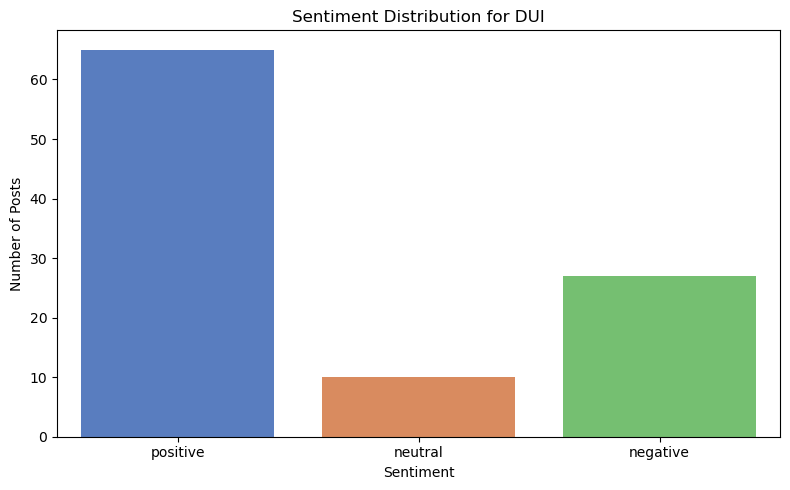

In [24]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from googletrans import Translator
import nest_asyncio
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Enable nested event loop (for Jupyter)
nest_asyncio.apply()

# Load DUI dataset
file_path = "dataset/ad-creative-bodies-extraction/DUI_ad_creative_bodies.csv"
assert os.path.exists(file_path), f"File not found: {file_path}"

df = pd.read_csv(file_path)
df = df.dropna(subset=["ad_creative_bodies"])

# Initialize translator and sentiment analyzer
translator = Translator()
analyzer = SentimentIntensityAnalyzer()

# Lists to store results
translated_texts = []
compound_scores = []
labels = []

# Translate and score sentiment
for text in df["ad_creative_bodies"]:
    try:
        translated = translator.translate(text, src='auto', dest='en').text
    except:
        translated = text  # fallback if translation fails

    sentiment = analyzer.polarity_scores(translated)
    compound = sentiment["compound"]

    if compound >= 0.05:
        label = "positive"
    elif compound <= -0.05:
        label = "negative"
    else:
        label = "neutral"

    translated_texts.append(translated)
    compound_scores.append(compound)
    labels.append(label)

# Add results to DataFrame
df["translated_text"] = translated_texts
df["compound"] = compound_scores
df["sentiment_label"] = labels

# Plot sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sentiment_label', order=['positive', 'neutral', 'negative'], palette='muted')
plt.title("Sentiment Distribution for DUI")
plt.xlabel("Sentiment")
plt.ylabel("Number of Posts")
plt.tight_layout()
plt.show()
